***Machine Learning Engineer Nanodegree***

**Capstone Project**

**I. Definition**

**Project Overview**

An Advanced Traveller Information System (ATIS) is any system that acquires, analyzes, and presents information to assist surface transportation travellers in moving from a starting location (origin) to their desired destination.[1] (Fatemeh Baratian-Ghorghi; Huaguo Zhou (2015). "Investigating Women's and Men's Propensity to Use Traffic Information in a Developing Country". Transportation in Developing Economies. doi:10.1007/s40890-015-0002-5#page-1 (inactive 2017-08-16).) Advanced Traveller Information Systems (ATISs) include a broad range of advanced computer and communication technologies. These systems are designed to provide riders information such as GPS coordination and travel time, to make better informed decisions regarding their mode of travel, planned routes and travel times. (Zito, P., Amato, G., Amoroso, S., & Berrittella, M. (2011). The effect of Advanced Traveller Information Systems on public transport demand and its uncertainty. Transportmetrica, Vol. 7 (1), Pp. 31-43.) It has been shown that having a better knowledge of pre-trip information can help drivers reduce their empty cruising by suggesting locations where they might find passengers, and help passengers reduce their waiting time. Moreover, decreasing empty taxi travel time and distance can result in less congestion and pollution. One such dataset is released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables. The dataset used in this project is from Kaggle competition dataset, which was sampled and cleaned already.  

The personal motivation to predict the trip duration in New York is that, when I visit NY, it is quite difficult to drive through all the jammed traffic and finding a parking space easily. Therefore, taking a taxi is my top choice to visit NY city. Using mobile app to get an estimated travel time and fare is very informative and becomes many riders’ behavior. Moreover, with the booming business of Uber, accurately prediction on the trip duration based on the hour of the day, pick / drop off location is going to be essential to provide to customers. In the future, self-driving taxi will run in metropolis.  Accurate prediction of travel time helps develop efficient navigation systems and plan better route, and identify bottlenecks in traffic networks. (Reference I. Jindal, Z. Qin, etc, A Unified Neural Network Approach for Estimating Travel Time and Distance for a Taxi Trip, 2017, https://arxiv.org/pdf/1710.04350.pdf)


**Problem Statement**

As we know, the travel time in a busy city like NYC is heavily related to traffic patterns, weather conditions, and traffic incidents. From the released dataset, pick up time, pick up / drop off locations are recorded. This project is going to discover the taxi traffic patterns in NYC, and to predict trip duration based on pick up time, passenger count, pick up location, and drop off location. Since the trip duration is a continuous number, this is a regression problem that can be expressed in mathematical terms. The model will be measured by Root Mean Squared Logarithmic Error, which is further explained in Evaluated Metric session. 

**Metrics**

The evaluation metric for this project is Root Mean Squared Logarithmic Error. Based on the plotting of trip_duration, we can see that it varies in a large range. Therefore, convert trip durations (prediction) into using log function saves training time and improves model accuracy. A good metric to evaluate log results is RMSLE. The function is defined as following.  

> The RMSLE is calculated as  
                          
                          ϵ = (sum((log(pi+1)-log(ai+1))^2)/n)^0.5
           
> Where:
     - ϵ is the RMSLE value (score)
     - n is the total number of observations in the (public/private) data set,
     - pi is your prediction of trip duration, and
     - ai is the actual trip duration for i. 
     - log(x) is the natural logarithm of x

**II. Analysis**

**Data Exploration**

Before starting analysis the data, it is essential to explore the data and detect any abnormality and throughly describe the data. In the following code, I am going to check the following aspects of the training data and testing data:
1. the shape of training, to get a rough understanding on the data dimension and problem complexcity.
2. plot the training y value to check for any outliers. 
3. check if there is any missing value.
4. check the data format of each column.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Basic Statistics

In [2]:
# Check the shape of available dataset 
train_data=pd.read_csv('train.csv')
print(train_data.shape)
train_data.head()

(1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


The data has 11 columns and 1,458,644 rows. There are 10 features,  and the details of the features are:
1. vendor_id - a code indicating the provider associated with the trip record
2. pickup_datetime - date and time when the meter was engaged
3. dropoff_datetime - date and time when the meter was disengaged
4. passenger_count - the number of passengers in the vehicle (driver entered value)
5. pickup_longitude - the longitude where the meter was engaged
6. pickup_latitude - the latitude where the meter was engaged
7. dropoff_longitude - the longitude where the meter was disengaged
8. dropoff_latitude - the latitude where the meter was disengaged
9. store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the 
10. vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

The last column in data is trip_duration in seconds, which can be used to train the model for prediction.


In [3]:
y_train=train_data['trip_duration'].values
# Since dropoff_datetime can be calculated out by knowing trip_duration and pickup_datetime, 
# it is dropped out for data cleanup.
x_train = train_data.drop(['trip_duration','dropoff_datetime'], axis = 1)
print(x_train.shape)

(1458644, 9)


Explore the data by checking the minimun, maximum, median and mean values of the trip_duration. From the results, the maximum trip duration is 3526282 seconds, which is 980 hours. And the minimum trip duration is 1 second. Based on common life experience, these are very extreme cases and probably worthy deeper look at outliers. 

In [4]:
# explore on the prediction - duration of the trip
min_duration=np.amin(y_train)
max_duration=np.amax(y_train)
mean_duration=np.mean(y_train)
median_duration=np.median(y_train)
std_duration=np.std(y_train)
print("Statistics for New York Taxi trip distance:\n")
print ("Minimal trip distance: {} second".format(min_duration))
print ("Maximum trip distance: {} second".format(max_duration))
print ("Median trip distance: {} second".format(median_duration))
print ("Mean trip distance: {:.0f} second".format(mean_duration))
print ("Trip distance standard derivation: {:.0f} second".format(std_duration))

Statistics for New York Taxi trip distance:

Minimal trip distance: 1 second
Maximum trip distance: 3526282 second
Median trip distance: 662.0 second
Mean trip distance: 959 second
Trip distance standard derivation: 5237 second


In [5]:
# Display data statistics for float format features
pd.set_option('display.float_format', lambda x: '%.2f' % x)
display(train_data.describe())

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


#### Check Outliers

Text(0.5,1,'Trip duration')

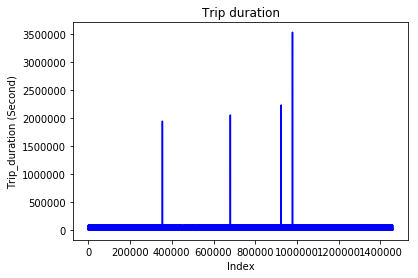

In [6]:
# Visualization of trip distance.
# this is for plotting pretty figures in notebook.
# need to be inline specifically, not %matplotlib notebook
%matplotlib inline

# Run-Sequence plot to check if there is any outliers.
# plt.figure(figsize=(8,5))
# plt.plot(range(100))
plt.plot(y_train,'b')
plt.xlabel('Index')
plt.ylabel('Trip_duration (Second)')
plt.title('Trip duration')
# There are outliers


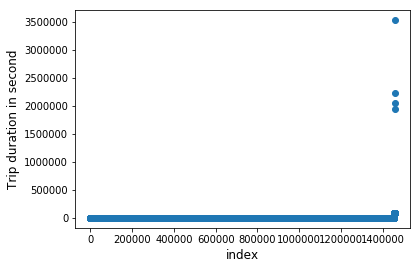

In [7]:
# seems like the trip duration scatters a lot, or there might be some outliers. 
# Need visualization to further understand it. 
# plt.figure(figsize=(8,6))
# plt.plot(range(100))
plt.scatter(range(x_train.shape[0]), np.sort(y_train))
plt.xlabel('index', fontsize=12)
plt.ylabel('Trip duration in second', fontsize=12)
plt.show()

#### Check Missing Value

Using isnull().sum(), a short line of code, it is clear to know there is no missing data in the training set.

In [8]:
# better code to check for missing values in train data set
variables_missing_value = train_data.isnull().sum()
variables_missing_value 


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Fortunately, for this dataset, there are no missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. 

#### Convert Data Format   –– overlapped with data preprocessing, see the following contents

Then we move on to check the data format. 
The id is the record serial number, and does not contribute to predict. Then leave it as is. 
* The pickup_datetime is an object. The datetime can be converted to hour in float format. 
* vendor_id can be 1 or 2, which is more like to chose from two categories. Therefore, this feature should be kept as integar.  
* Store_and_fwd_flag can be N or Y, which should be converted to 0 or 1 for model training purpose.   
* passenger_count, trip_duration, etc are better to convert into float.

### Exploratory Visualization with Data Preprocessing

In this section, summarization and relevant characteristic about the data are visualized. Meanwhile, the data is preprocessed and ready for algorithm implementation. 
    * Store_forward flag records comparison.
    * Pickup hour effect to trip durations, and trip counts. 
    * Pickup day effect to trip durations, and trip counts. 
    * Pickup month effect to trip durations, and trip counts. 
    * Vendor id effect to trip duration and trip counts. 
    * Pickup, dropoff 2D locations. 
    * Pickup, dropoff locations animation on NYC map changing with month. 
    * Trip duration Vs. counts 
    

In [9]:
# convert object type into int typeb
train_data['store_and_fwd_flag']=train_data['store_and_fwd_flag'].apply(lambda x:1 if x=="Y" else 0)

# Convert store_and_fwd_flag into 0 or 1 int format
n_Y = len(train_data[train_data.store_and_fwd_flag==1])
n_N = len(train_data[train_data.store_and_fwd_flag==0])
print("The number of store_forward flag is: {}". format(n_Y))
print("The number of NOT store_forward flag is: {}". format(n_N))

The number of store_forward flag is: 8045
The number of NOT store_forward flag is: 1450599


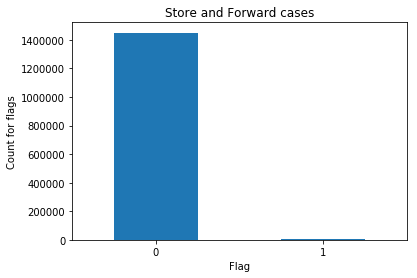

In [10]:
#Let us explore whether the trip details are stored or forwarded
# from the histogram plot, most cases were stored and uploaded later
plt.figure()
train_data["store_and_fwd_flag"].value_counts().plot(kind='bar')
plt.title("Store and Forward cases")
plt.xticks(rotation='horizontal')
plt.ylabel("Count for flags")
plt.xlabel("Flag");

In [11]:
import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time

In [12]:
# Convert pickup datetime object format to float format, and extract out month, day, day of the week, hour 
# Neglect dropoff datetime since in NYC most taxi trip is not over 1 day. 
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
index = train_data['pickup_datetime'].index
train_data['pickup_months'] = train_data['pickup_datetime'].dt.month.astype(float)
train_data['pickup_days'] = train_data['pickup_datetime'].dt.day.astype(float)
train_data['day_of_week'] = train_data['pickup_datetime'].dt.dayofweek.astype(float)
train_data['pickup_hours'] = train_data['pickup_datetime'].dt.hour.astype(float)

In [13]:
train_data['pickup_months'].describe()

# The training data only provides 6 months of the year from month 1 to 6

count   1458644.00
mean          3.52
std           1.68
min           1.00
25%           2.00
50%           4.00
75%           5.00
max           6.00
Name: pickup_months, dtype: float64

In [14]:
train_data['pickup_days'].describe()
# among all provided training data, 
print("There are : {} unique days provided in training data". format(len(train_data['pickup_days'].unique())))

There are : 31 unique days provided in training data


In [15]:
train_data['day_of_week'].describe()
# among all provided training data, 
# Monday is 0, Sunday is 6

count   1458644.00
mean          3.05
std           1.95
min           0.00
25%           1.00
50%           3.00
75%           5.00
max           6.00
Name: day_of_week, dtype: float64

In [16]:
# Convert passenger_count and trip_duration from int to float. 
# for features in ['passenger_count','trip_duration','pickup_months','pickup_days']:
for features in ['passenger_count','trip_duration']:
    train_data[features]=train_data[features].astype(float)
train_data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count              float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                float64
pickup_months                float64
pickup_days                  float64
day_of_week                  float64
pickup_hours                 float64
dtype: object

In [17]:
# Split the training data inot X and Y 
y_train=train_data['trip_duration'].values
# x_train = good_data.drop(['trip_duration','dropoff_datetime'], axis = 1)

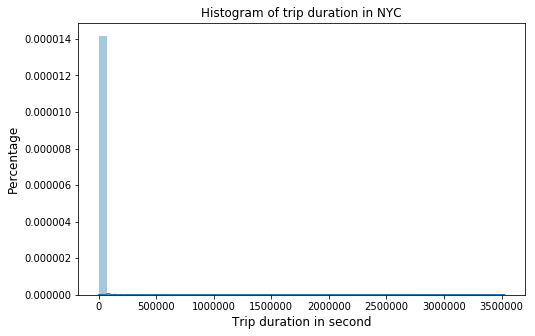

In [18]:
# Plot the X-Y to reveal trip duration distribution
plt.figure(figsize=(8,5))
sns.distplot(y_train, bins=50, kde=True)
plt.xlabel("Trip duration in second", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Histogram of trip duration in NYC")
plt.show()

It shows that the data is highly screwed, most are at low value, and several at very high (80000). Therefore, to predict the logrithm and plot the logrithm is better. From the log X-Y plot, the X-logY fits better in Normal distribution.

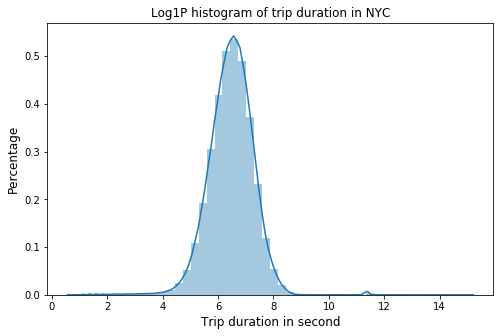

In [19]:
# Convert the prediction (y_model) into log(y_model+1) format
y_model=np.log1p(y_train)
plt.figure(figsize=(8,5))
sns.distplot(y_model, bins=50, kde = True)
plt.xlabel("Trip duration in second", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Log1P histogram of trip duration in NYC")
plt.show()

In [20]:
# define plotting function to explore the effect of pickup hour, pickup day, day of the week
# and pickup month verses trip duration and trip counts. 
def pick_duration_plot(feature,data):
    
    mean_duration = data.groupby(feature)['trip_duration'].mean()
    median_duration = data.groupby(feature)['trip_duration'].median()
    count_trips = data.groupby(feature)['trip_duration'].count()
    x_feature = [int(i) for i in mean_duration.index]
  
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)
    ln1 = plt.plot(x_feature, mean_duration, marker = 'o', label = 'Mean of trip duration')
    ln2 = plt.plot(x_feature, median_duration, marker = 'o', label = 'Median of trip duration')
    ax.set_xlabel(feature)
    ax.set_ylabel('Trip duration(s)')
    plt.title("The effect of {} to trip duration and trip counts".format(feature))
   
    ax2 = ax.twinx()
    ln3 = ax2.plot(x_feature,count_trips,marker='s',color='r',label='Count of trips')
    ax2.set_ylabel('Trip counts')
    
    lns = ln1+ln2+ln3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='best')

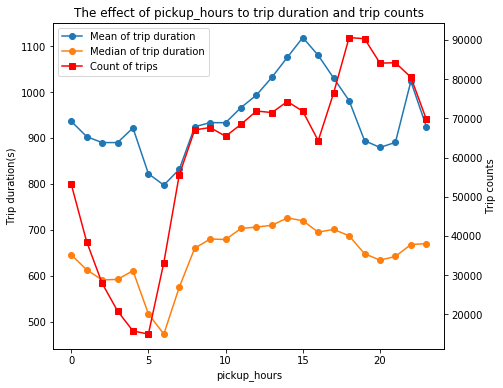

In [21]:
pick_duration_plot('pickup_hours',train_data)

1. Median and mean of trip duration show similar trend. 
    - The longest trip is at 2-4pm, when is a common time period to arrive at a new city by airline since most the domestic flight arrives in the afternoon.
    - At about 6am, the trip duration is the shorest. 6pm is the commute to work time, and working people in New York tends to take public transportation to get close to office and then work or take a short trip of taxi.
    - The longer trips are from 10am to 6pm. If people takes tour, goes to airport/trainstation, the trips take longer in taxi. And for touriest and the people whoes destination is airport / trainstation, late morning and afternoon are preferred time.
2. Trip counts climes to its peak at 5-6pm, when people commute back home. After 6pm, the trip counts decreases till 5am and climbes back again. Therefore, pickup hour has a strong effect on the trip counts.

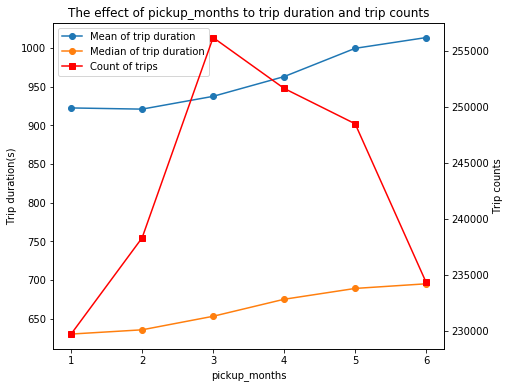

In [22]:
pick_duration_plot('pickup_months',train_data)

1. Median and mean of trip duration show similar trend. 
    - The trip duration increases with month number. 1 stands for January and 6 stands for June. Towarding summer time, people tends to take longer trip with taxi. 
2. Trip counts reaches highest at March at then continuously drops. It is possible that more trips happen in March, however, I am not sure the reason. Since we have not taken out outliers, there might be some errors caused by outliers. 

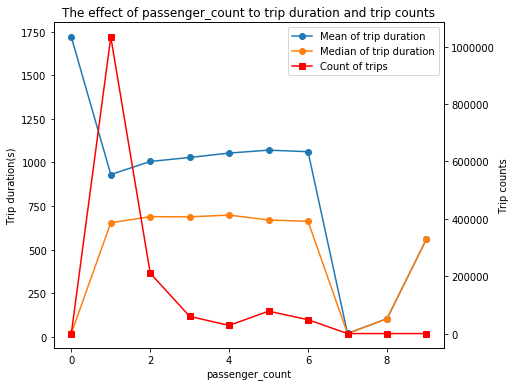

In [23]:
pick_duration_plot('passenger_count',train_data)

1. Median and mean of trip duration
    - At 0 customer, the mean of trip duration is the longest. In contrast, the median of trip duration is 0. This tells us that more than half of 0 customer, the trip duration is 0. However, there are some trips last long, which might introduce by picking up customers at distanced location. And we need to take out 0 trip durations as outliers. 
    - For riders from 1 to 6, the trip duration are quite close. It is probably caused by most cars can at most take 6 riders and 1 driver. 
    - At 7 passengers, the trip duration is the lowest, might because it is rare to find a 8 seats taxi cars other than limo. People is likely to book a limo when the riders are more than 7.
2. Most of the trips in NYC are just 1 rider. This reveal the pattern that many people in NYC takes taxi along.  

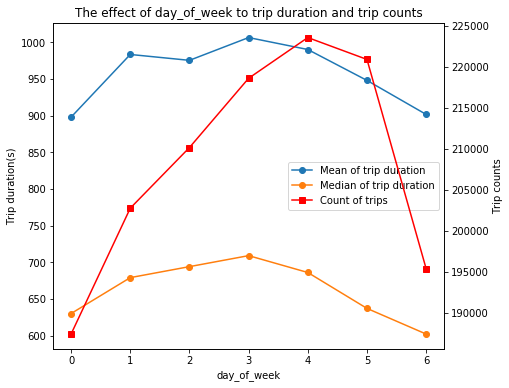

In [24]:
pick_duration_plot('day_of_week',train_data)

1. Median and mean of trip duration show similar trend. 
    - On Saturday and Sunday, the trip durations are shorter. 
    - On Wedensday, trips last longest. 
2. Trip counts 
    - On Saturday and Sunday, the trip counts are less. 
    - More trips are during the weekdays, and the most frequent trips are on Thursday. 

Text(0.5,1,'The effect of Vendors to trip duration')

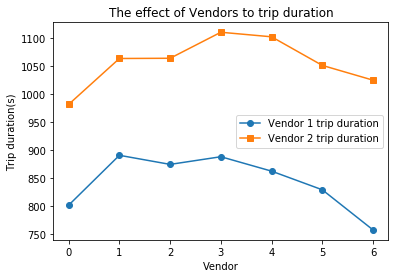

In [25]:
v1_trip_duration = train_data.loc[train_data['vendor_id']==1].groupby('day_of_week')['trip_duration'].mean()
v2_trip_duration = train_data.loc[train_data['vendor_id']==2].groupby('day_of_week')['trip_duration'].mean()
ln1=plt.plot(range(0,7,1), v1_trip_duration, marker = 'o', label = 'Vendor 1 trip duration')
ln2=plt.plot(range(0,7,1), v2_trip_duration, marker = 's', label = 'Vendor 2 trip duration')
plt.legend()
plt.xlabel('Vendor')
plt.ylabel('Trip duration(s)')
plt.title("The effect of Vendors to trip duration")

From the above plot, it clearly shows that vendor 2 has longer trip duration on average than vendor 2. Therefore, we need to consider vendor id factors into the model prediction. 

#### Locations plot

Now we are going to explore how the pick up / drop off locations affect the trip duration. First, let me plot the histogram graphes of pick up latitude, pick up longitude, dropoff latitude, dropoff longitude.


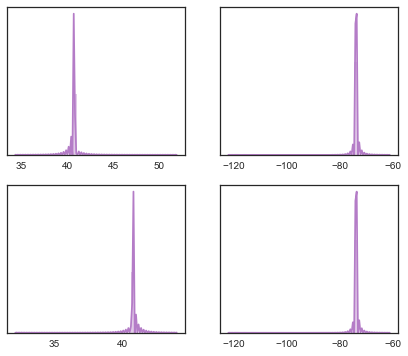

In [26]:
sns.set(style="white",palette="muted",color_codes=True)
f,axes = plt.subplots(2,2,figsize=(7,6),sharex=False,sharey=False)

sns.distplot(train_data['pickup_latitude'].values, label='pickup_latitude',color="m", bins=50, ax=axes[0,0])
sns.distplot(train_data['pickup_longitude'].values, label = 'pickup_longitude',color="m",bins=50, ax=axes[0,1])
sns.distplot(train_data['dropoff_latitude'].values, label = 'dropoff_latitude',color="m", bins=50,ax=axes[1,0])
sns.distplot(train_data['dropoff_longitude'].values, label = 'dropoff_longitude',color="m", bins=50,ax=axes[1,1])
plt.setp(axes, yticks=[])
# plt.tight_layout()
plt.show()

By looking at the above plots, the coordination spreads over a large area, so we want to zoom in to tighter ranges. After trial and error, the proper latitude range is 40.6-40.9, and the proper longitude range is -74.3~ -74.9

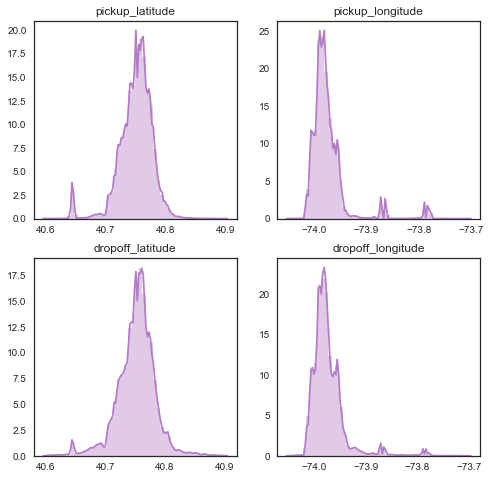

In [27]:
law=40.6
lah=40.9
low=-74.05
loh=-73.70

df = train_data.loc[(train_data.pickup_latitude > law) & (train_data.pickup_latitude < lah)]
df = df.loc[(df.dropoff_latitude> law) & (df.dropoff_latitude < lah)]
df = df.loc[(df.dropoff_longitude > low) & (df.dropoff_longitude < loh)]
df = df.loc[(df.pickup_longitude > low) & (df.pickup_longitude < loh)]
train_data_new = df.copy()

# sns.set(style="white",palette="muted",color_codes=True)
f, axes = plt.subplots(2,2,sharex=False, sharey=False,figsize=(8,8))
# f,axes = plt.subplots(2,2,figsize=(7,6),sharex=False,sharey=False)
sns.distplot(train_data_new['pickup_latitude'].values,color="m", bins=50,ax=axes[0,0])
axes[0][0].set_title("pickup_latitude")
sns.distplot(train_data_new['pickup_longitude'].values, color="m",bins=50,ax=axes[0,1])
axes[0][1].set_title("pickup_longitude")
sns.distplot(train_data_new['dropoff_latitude'].values, color="m", bins=50,ax=axes[1,0])
axes[1][0].set_title("dropoff_latitude")
sns.distplot(train_data_new['dropoff_longitude'].values, color="m", bins=50,ax=axes[1,1])
axes[1][1].set_title("dropoff_longitude")
plt.show()

Now let us plot the detailed locations on map to show specific popular pick up / drop off areas in NYC.

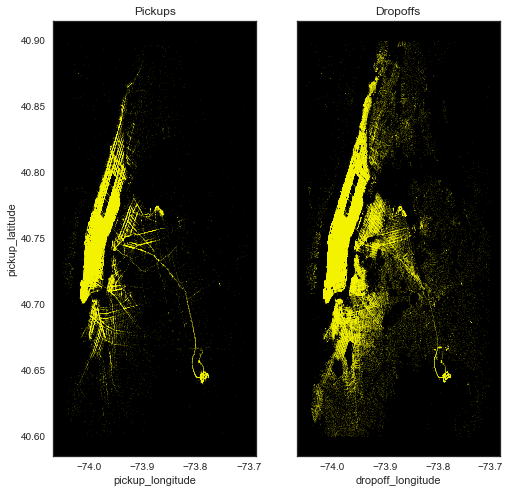

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(8,8))

train_data_new.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

train_data_new.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 

From the above pickup / dropoff scatter plots, Manhattan island, LaGuardia airport, JFK airport are bright yellow means many trips are starts and ends at these areas. This makes perfect sense since in 2016, there are total 60.5 million travellers visited NYC, and 8.53 million population living in NYC. Most sight seeings are located in Manhattan, therefore, there are very high chance trips start / end in this area. New York airports are the most busiest airports in the world, and people tends to take taxi for departure / return.

Compare the pickup / dropoff locations, more trips ends at Queens, Brooklyn and north of Manhattan. Majority of people lives at other districts other than Manhattan due to the living cost. And more people choose to take taxi after hang over in parties, or return from the airports.

In [29]:
# It shows that most of the pick up and drop off locations are actually in a pretty narrow range. 
# visualize the pick up and drop off locations by map
# Visualize pickup and dropoff locations in NYC.

#Extract the month column from pickup datetime variable and take subset of data
train_data_new['dropoff_datetime'] = pd.to_datetime(train_data_new.dropoff_datetime)
train_data_new['dropoff_month'] = train_data_new['dropoff_datetime'].dt.month

heat_df =train_data_new.sample(n=3000)

#Extract required columns
heat_df = heat_df[['dropoff_latitude', 'dropoff_longitude','dropoff_month']]


# Ensure you're handing it floats
heat_df['dropoff_latitude'] = heat_df['dropoff_latitude'].astype(float)
heat_df['dropoff_longitude'] = heat_df['dropoff_longitude'].astype(float)


#remove NANs
heat_df = heat_df.dropna(axis=0)


# Create weight column, using date
heat_df['Weight'] = heat_df['dropoff_month']
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['dropoff_latitude','dropoff_longitude', 'Weight'])

# Thanks for this nice tutorial
#https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data
# Borrow the idea from https://www.kaggle.com/poonaml/last-cab-to-new-york-animated-heatmap-trips-folium/notebook
import folium  
# new york city map imported throught folium
newyork_on_heatmap = folium.Map(location=[40.767937,-73.982155 ],tiles= "Stamen Terrain",
                    zoom_start = 5) 

# List comprehension to make out list of lists
heat_data = [[[row['dropoff_latitude'],row['dropoff_longitude']] 
                for index, row in heat_df[heat_df['Weight'] == i].iterrows()] 
                 for i in range(0,6)]
from folium import plugins
from folium.plugins import HeatMapWithTime
# Plot it on the map
# import plugins
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
# hm = HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(newyork_on_heatmap)

# Display the map
newyork_on_heatmap

#### Algorithms and Techniques

XGBoost is an advanced implementation of gradient boosting algorithm. It is a highly sophisticated algorithm and uses multiple parameters. For this project, it takes only 19s for a well tuned algorithm to train 1.16million rows of data and predict based on 0.29million rows of data. If I use the default setting on my person pc, it takes more than 2 hours to run the same size of data. From my experience and many others, tuning parameter of XGBoost is must. 

** XGBoost Advantage**
    * fast, implements parallel processing
    * high flexible, allow users to define custom optimization objectives and evaluation criteria
    * handle missing values, XGBoost has an in-built routine to handle missing values
    * built-in Cross-Validation, allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run. 
    * continue on existing model, user can start training an XGBoost model from its last iteration of previous run. 

**Parameters tuning**
The overall parameters have been divided into 3 categories. 
    - General parameters: guid the overal functioning. 
    - Booster parameters: guide the individual booster at each step.
    - Learning task parameters: guide the optimization performed. 

##### General Parameters
1. booster, use default gbtree as tree-based models. 
2. silent, use default 0 to not print out running messages. 

##### Booster Parameters
1. eta, learning rate, default is 0.3. Use 0.3 as star point, typical final values 0.01-0.2. 
2. gamma, the minimum loss reduction required to make a further partition on a leaf node of the tree. The larger, the more conservative the algorithm will be.
3. max_depth, the maximum depth of a tree. We will start at 6, and tune it using CV. Typical values 3-10. 
4. min_child_weight, minimum sum of instance weight needed in a child. The larger, the more conservative the algorithm will be. Default is 1 and need be tuned using CV. 
5. subsample, subsample ratio of the training instance. Default is 1 and typical values are 0.5-1, the lower, the more conservative the algorithm be. 
6. colsample_bytree, denotes the fraction of columns to be randomly samples for each tree, default is 1 and typical values are 0.5-1. 

The rest parameters are not tuned in this project. 

##### Learning task parameters
1. objective, defines the loss function to be minimized. I used default reg:linear since it returns predicted probability rather than class. 
2. eval_metric, selects the metric to be used for validation data. RMSE is used on data which is already converted to log. 
3. seed is the random number, select 1958 for generating reproducible results. 

Many of the above ideas and summarization was learned from AARSHAY JAIN publication Complete Guide to Parameter Tuning in XGBoost. 


#### Benchmark 

Use the medium number of each hour as the benchmark model. Since the model is to predict trip duration based on pickup time, pickup / drop off location, etc. The hour of day indicates the rush or non-rush hour conditions, which heavily affected the trip duration. From data visualization, there are quite a few large data points which makes median number is more representative than the mean of the whole distribution. Therefore, using the median value in each hour from train data will be the benchmark model. The Naive predictor gets 0.7924 RMSLE score. Let us use more advanced algorithm to improve the prediction and lower the RMSLE score. 

#### Evaluate Metric 

The model will be evaluated with RMSLE - Root Mean Squared Logarithmic Error score. Because we converted all trip duration (in second) to log(trip_duration+1), then we can just use RMSE score to evaluate equavelently. The codes of both functions are listed below.

In [37]:
# def rmsle(y_true,y_pred):
#     score=np.square(np.log1p(y_pred)-np.log1p(y_true)).mean()**0.5
#     return score

def rmse(y_true,y_pred):
    score=np.square((y_pred)-(y_true)).mean()**0.5
    return score

In [38]:
median_hour_duration = train_data.groupby('pickup_hours')['trip_duration'].median()
# Method: use the pickup hour as index and read the trip_duration from the median_hour_duration. 
 # choose the first 10000 records to evaluate
Z = train_data['pickup_hours'].values
y_predict = np.log1p([ median_hour_duration.get(x) for x in Z[:10000]])
y_true = np.log1p(y_train[:10000])
from sklearn.metrics import mean_squared_error
fscore = rmse(y_true, y_predict[:10000])

# Print the results 
print("Naive Predictor: [RMSLE score: {:.4f}]".format(fscore)) 

Naive Predictor: [RMSLE score: 0.7924]


## III. Methodology

### Data Preprocessing

In this section, the data is preprocessed to prepare for model implementation. These are going to be implemented: 
 * From Data Exploration section, there are outliers that requires to be taken out.  
 * Some of the features are needed to taken out for model regression.
 * Convert y_model, which stands for trip duration to log(1+trip_duration).

From Data Exploration section, we know clearly that there are outliers. After test and error, the quantile of 0.999 is chosen as the upper limit of data, since at 0.999 quantile, the trip duration is about 24 hours. In real life, higher than 1 day of taxi is very rare. The lower limit is chosen from the 0.001 quantile, which is only 7 seconds. By setting the upper and lower limit, we can eliminate the data was generated due to system error, typo, etc. Based on these standards, 2780 records are taken out from the train data as the outliers.

In [39]:
outliers=[]
limit_upper = train_data.trip_duration.quantile(0.999)
limit_lower = train_data.trip_duration.quantile(0.001)
print("limit_upper is: {:0.1f} hour".format(limit_upper/3600))
print("limit_lower is: {:0.1f} second".format(limit_lower))

limit_upper is: 23.6 hour
limit_lower is: 7.0 second


In [40]:
# Take out outliers
for index in train_data.index:
    if train_data['trip_duration'].values[index]>limit_upper or train_data['trip_duration'].values[index]<limit_lower:
        outliers.append(index)
        
good_data = train_data.drop(train_data.index[list(outliers)]).reset_index(drop = True)
good_data.shape
print("There are {} outliers in train data.". format(train_data.shape[0]-good_data.shape[0]))

There are 2780 outliers in train data.


In [41]:
# drop features for model regression.
# Convert y_model, which stands for trip duration to log(1+trip_duration).
model_data = good_data.copy()
x_model = model_data.drop(['id','trip_duration','pickup_datetime','dropoff_datetime'], axis = 1)
y_model = np.log1p(model_data['trip_duration'].values)

### Implementation

In this section, XGBoost algorithms and parameter tuning techniques for the processed data (modal_data) will be implemented. 


#### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features. As always, we will now split the data (both features and their labels) into training and testing sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [42]:
# the kaggle project does not provide testing data true vale. 
# Therefore, we can only use training data and split it into train and test
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(x_model,y_model,train_size=0.8,test_size=0.2,random_state=1)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


#### XGBoost Algorithm

XGBoost is an advanced implementation of gradient boosting algorithm. It is a highly sophisticated algorithm and uses multiple parameters. From the above example, it takes only 19s for this algorithm to train 1.16million rows of data and predict based on 0.29million rows of data. If I use the default setting on my person pc, it takes more than 2 hours to run the same size of data. From my experience and many others, tuning parameter of XGBoost is must. 

In [43]:
# XGBoost necessary packages
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

# The data is stored in a DMatrix object.
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)


In [44]:
# Created a watchlist to show RMSE score during simulation. 
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# max_depth start point 6, grid search range(4,10,2)
md = range(6,10,2)
# learning rate, start point 0.3, grid search range 0.01-0.3, range(0.1,0.3,0.1)
lr = [0.01,0.1,0.2,0.3]
# min_child_weight, default is 1. 
mcw = range(10,60,20)

for m in md:
    for l in lr:
        for n in mcw:
            start = time.time()
            xgb_pars = {'min_child_weight': n, 'eta': l, 'colsample_bytree': 0.3, 
                       'max_depth': m,'subsample': 0.9, 'lambda': 1., 'nthread': 4,
                        'booster' : 'gbtree', 'silent': 1, 'eval_metric': 'rmse', 'objective': 'reg:linear','seed':1958}
            model = xgb.train(xgb_pars, dtrain, 50, watchlist, early_stopping_rounds=10,
                 maximize=False, verbose_eval=5)
            end = time.time()
            print("Max_depth is {}, min_child_weight is {}, learning rate is {}".format(m,n,l))
           
            print("Time taken by above cell is {}.".format(end - start))
            print('Modeling RMSLE %.5f' % model.best_score)


[0]	train-rmse:5.95642	valid-rmse:5.95617
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[5]	train-rmse:5.6686	valid-rmse:5.66834
[10]	train-rmse:5.39554	valid-rmse:5.39528
[15]	train-rmse:5.13598	valid-rmse:5.13574
[20]	train-rmse:4.88924	valid-rmse:4.88901
[25]	train-rmse:4.65484	valid-rmse:4.65462
[30]	train-rmse:4.43248	valid-rmse:4.43227
[35]	train-rmse:4.22118	valid-rmse:4.22097
[40]	train-rmse:4.01996	valid-rmse:4.01974
[45]	train-rmse:3.82945	valid-rmse:3.82924
[49]	train-rmse:3.68373	valid-rmse:3.68351
Max_depth is 6, min_child_weight is 10, learning rate is 0.01
Time taken by above cell is 23.13617777824402.
Modeling RMSLE 3.68351
[0]	train-rmse:5.95642	valid-rmse:5.95617
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[5]	train-rmse:5.6686	valid-rmse:5.66834
[10]	train-rmse:5.39554	v

Max_depth is 6, min_child_weight is 30, learning rate is 0.3
Time taken by above cell is 18.862733840942383.
Modeling RMSLE 0.54276
[0]	train-rmse:4.24383	valid-rmse:4.24342
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[5]	train-rmse:0.946665	valid-rmse:0.946615
[10]	train-rmse:0.633943	valid-rmse:0.634638
[15]	train-rmse:0.615462	valid-rmse:0.616625
[20]	train-rmse:0.593847	valid-rmse:0.595238
[25]	train-rmse:0.58131	valid-rmse:0.582683
[30]	train-rmse:0.580291	valid-rmse:0.581781
[35]	train-rmse:0.578478	valid-rmse:0.580089
[40]	train-rmse:0.559396	valid-rmse:0.56109
[45]	train-rmse:0.557434	valid-rmse:0.559213
[49]	train-rmse:0.547787	valid-rmse:0.549664
Max_depth is 6, min_child_weight is 50, learning rate is 0.3
Time taken by above cell is 18.300271034240723.
Modeling RMSLE 0.54966
[0]	train-rmse:5.95642	valid-rmse:5.95617
Multiple eval metrics have been passed: 'valid-rmse' will be

[40]	train-rmse:0.515743	valid-rmse:0.52089
[45]	train-rmse:0.513457	valid-rmse:0.518925
[49]	train-rmse:0.507573	valid-rmse:0.513309
Max_depth is 8, min_child_weight is 10, learning rate is 0.3
Time taken by above cell is 23.984621047973633.
Modeling RMSLE 0.51331
[0]	train-rmse:4.24377	valid-rmse:4.24339
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[5]	train-rmse:0.938739	valid-rmse:0.939018
[10]	train-rmse:0.621692	valid-rmse:0.623201
[15]	train-rmse:0.601916	valid-rmse:0.604475
[20]	train-rmse:0.577852	valid-rmse:0.580935
[25]	train-rmse:0.564121	valid-rmse:0.567521
[30]	train-rmse:0.562991	valid-rmse:0.566645
[35]	train-rmse:0.561019	valid-rmse:0.565
[40]	train-rmse:0.515381	valid-rmse:0.520117
[45]	train-rmse:0.513153	valid-rmse:0.518138
[49]	train-rmse:0.507622	valid-rmse:0.512795
Max_depth is 8, min_child_weight is 30, learning rate is 0.3
Time taken by above cell is 26.485298156

### Refinement

From the above grid search method, with 24 different combinations
  * learning rate affect the rmse significantly, the higher learning rate, the better score is. Should choose 0.3 for final model. 
  * min_child_weight slight change the rmse score, 30 gives the best score among 10, 30, 50. Therefore, 30 seems to be a good choice for the final model. 
  * max_depth shows the higher depth the better the score is. The maximum we can try is 10 and will be trialed in the following code. 

Combination of :
Max_depth is 10, min_child_weight is 30, learning rate is 0.3

The above refined combination improves the rmsle score to 0.4794 from the best score as 0.4971 with the combination of Max_depth as 8, min_child_weight as 30, and learning rate as 0.3. 

The benchmark model has rmsle score as 0.7997. The XGBoost refined model has a signifcant higher score than the naive model.


In [45]:
start = time.time()
n=30
l=0.3
m=10
xgb_pars = {'min_child_weight': n, 'eta': l, 'colsample_bytree': 0.3, 
                       'max_depth': m,'subsample': 0.9, 'lambda': 1., 'nthread': 4,
                        'booster' : 'gbtree', 'silent': 1, 'eval_metric': 'rmse', 'objective': 'reg:linear','seed':1958}
model = xgb.train(xgb_pars, dtrain, 50, watchlist, early_stopping_rounds=10,
                 maximize=False, verbose_eval=5)
end = time.time()
print("Max_depth is {}, min_child_weight is {}, learning rate is {}".format(m,n,l))
           
print("Time taken by above cell is {:.1f}.".format(end - start))
print('Modeling RMSLE %.5f' % model.best_score)


[0]	train-rmse:4.24377	valid-rmse:4.24339
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[5]	train-rmse:0.931617	valid-rmse:0.932262
[10]	train-rmse:0.610096	valid-rmse:0.612851
[15]	train-rmse:0.588598	valid-rmse:0.593472
[20]	train-rmse:0.561588	valid-rmse:0.567537
[25]	train-rmse:0.547856	valid-rmse:0.554658
[30]	train-rmse:0.546371	valid-rmse:0.553747
[35]	train-rmse:0.544058	valid-rmse:0.55223
[40]	train-rmse:0.503354	valid-rmse:0.512549
[45]	train-rmse:0.500762	valid-rmse:0.510675
[49]	train-rmse:0.494605	valid-rmse:0.505258
Max_depth is 10, min_child_weight is 30, learning rate is 0.3
Time taken by above cell is 32.3.
Modeling RMSLE 0.50526


## IV. Results

### Model Evaluation and Validation

Using plot_importance in XGBoost package, the features are listed by weight order as following. For trip duration, the top five features are pickup latitude, dropoff longitude, dropoff latitude, pickup longitude and pickup days. The sumation of drop off location weight is very similar to pick up location weight. Moreover, the sumation of locations weight much heavier than the sumation all the rest features. Therefore, XGBoost model predicts that locations, including pickup and dropoff, are the most relevent features to predict trip duration in NYC. The locations weight the most, this is actually making sense since distance is positive correlated to trip duration. 

For the date relavent features, the weight descending order is pickup days, months, hours, and day of week. My original thoughts when pre-processing data are, pickup_hours is the most important feature to predict trip duration. However, from XGBoost model, it only counts as the 8th most important feature. Surprisingly, passenger_count weights more than pickup_hours. And vendor_id does relavent to predict the trip duration as shown in the plot below. 


In [108]:
n=(5669+4572+3243+1349+3234)/(5669+4572+3243+1349+3234+686+657+635+399+284+119)*100
print("The weight percentage of the sumation of top 5 features: {:.2f} %".format(n))

The weight percentage of the sumation of top 5 features: 86.66 %


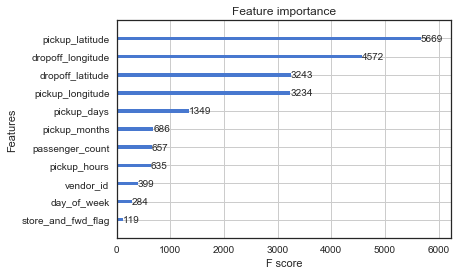

In [46]:
%matplotlib inline
plot_importance(model)
plt.show()

### Justification
It is time to test my model on real cases in the testing dataset. The evaluation metric is rmsle. Since the y (target) is already converted to log1p, then we can use rmse function, which outputs fscore to evaluate the model. My final model with the best combination of parameters gives out 0.5053 rmsle score, which is better than the benchmark model at 0.7997. 

In [47]:
# make predictions for test data
# y_pred = model.predict(X_test)
y_pred=model.predict(dvalid)
fscore = rmse(y_test, y_pred)

In [48]:
# Print the results 
print("My XGBoost Predictor: [RMSLE score: {:.4f}]".format(fscore)) 

My XGBoost Predictor: [RMSLE score: 0.5053]


### Improvement

Other than XGBoost model, Scikit-learn classifier provide adaboost and random forests algorithm out of box version. Since there are many parameters need to be tuned in XGBoost model, it is worthy exploring if these two algorithm handles better without even tuning parameter.  Besides that, these two algorithm also have a feature_importance_ attribute. Therefore, I am going to run these two algorithm and use them as other benchmark models against my XGBoost model. 
    - Training the default setting of RandomForesterRegressor takes 127s and the rmsle score is 0.3829, which is a significant improvement compared with optimized XGBoost model. 
    - Training the default setting of Adaboost takes 101s and the rmsle score is 0.3829, which is a significant improvement compared with optimized XGBoost model. 

In [50]:
from sklearn.ensemble import RandomForestRegressor
from time import time

# from time import time
start = time() # Get start time
rf=RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)
end = time() # Get end time
print("Time taken by above cell is {:.1f}s.".format(end - start))

Time taken by above cell is 126.7.


In [51]:
y_pred_rf = rf.predict(X_test)
fscore_rf = rmse(y_test, y_pred_rf)
# Print the results 
print("My RandomForester Regressor Predictor: [RMSLE score: {:.8f}]".format(fscore_rf)) 

My RandomForester Regressor Predictor: [RMSLE score: 0.38293934]


In [84]:
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [52]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    n=8
    columns = X_train.columns.values[indices[:n]]
    values = importances[indices][:n]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(n), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(n) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(n), columns)
    plt.xlim((-0.5, 7.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 8)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

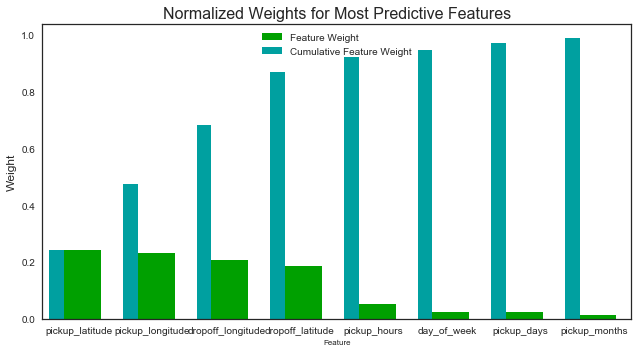

In [53]:
importances = rf.feature_importances_
feature_plot(importances, X_train, y_train)

In [54]:
from sklearn.ensemble import AdaBoostRegressor
# from time import time
start = time() # Get start time
ab=AdaBoostRegressor(random_state=1)
ab.fit(X_train,y_train)
end = time() # Get end time
print("Time taken by above cell is {:.1f}s.".format(end - start))


Time taken by above cell is 101.2s.


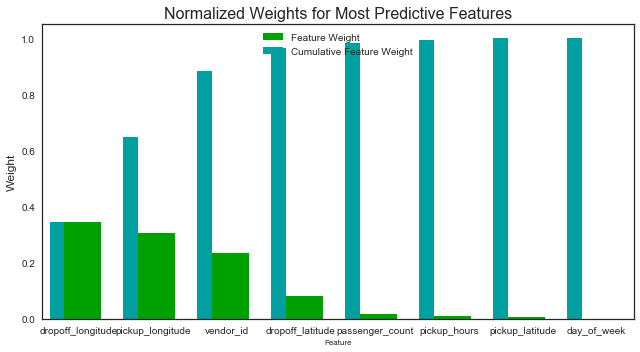

In [56]:
importances = ab.feature_importances_
feature_plot(importances, X_train, y_train)

Random Forester regressor predicts the top 8 features:
    - pickup / dropoff locations, 
    - pickup hours, day of week, pickup days and pickup months. 
Adaboost regressor predicts the top 8 features:
    - dropoff longitude, pickup up longitude, 
    - vendor id, 
    - dropoff latitude, 
    - passenger count, 
    - pickup hours, 
    - pickup latitude, 
    - day of week.  
Compare with Random Forest and XGBoost regressors, Adaboost predictive features are more a balanced of location, vendor, passenger count, and datetime. 

The parameter as "max_depth" are tunable in both XGBoost and RandomForest models. The default of max depth in XGBoost is 6, while the default in RandomForest is none. Therefore, the nodes in RandomForest are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. There is no maximum limits on the max depth, however, increase this value will make the model more complex / likely to be overfitting. Therefore, in XGBoost model, the max depth is chosen as 10 from a grid search in the range from 4 to 10. 

Using the default max depth in RandomForest, the nodes will expand when min_samples_split=2. The rmsle result is improved from 0.5053 (best of XGBoost model) to 0.3829. However, this might cause overfitting issue. 

In order to do a head-to-head comparison with XGBoost, we need run a grid search in Random Forest model to decide the max depth. Cross validation on the training dataset and grid search are implemented as below. The results show that 10 is the optimal max depth for Random Forest model. 

Compare the results and time spend to train the model, XGBoost is a better choice and the final model used to predict NYC taxi trip duration.

           XGBoost        RandomForest
    Time    32s                 58s
    RMSLE   0.5053              0.5441

In [74]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

# def fit_model(X, y):
def fit_model(x_model, y_model):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(x_model.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a Random Forester regressor
    regressor = RandomForestRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 4 to 10
    params={"max_depth":list(range(4,11))}
    

    # Transform 'rmse' into a scoring function using 'make_scorer' 
    # The lower the score is, the better. Therefore, define greater_is_better = False
    scoring_fnc = make_scorer(rmse,greater_is_better=False)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor,params, scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(x_model, y_model)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


In [75]:
# Fit the training data to the model using grid search
reg = fit_model(x_model,y_model)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 10 for the optimal model.


In [76]:
# Used the optimized max depth =10 
# from time import time
start = time() # Get start time
rf=RandomForestRegressor(max_depth=10,random_state=1)
rf.fit(X_train,y_train)
end = time() # Get end time
print("Time taken by optimized Random Forest regressor is {:.1f}s.".format(end - start))

Time taken by optimized Random Forest regressor is 58.2s.


In [77]:
y_pred_rfo = rf.predict(X_test)
fscore_rfo = rmse(y_test, y_pred_rfo)
# Print the results 
print("My Optimized RandomForester Regressor Predictor: [RMSLE score: {:.8f}]".format(fscore_rfo)) 

My Optimized RandomForester Regressor Predictor: [RMSLE score: 0.54407384]


## V. Conclusion



### More Visualization 

From the jointplot shown below, the Pearson correlation coefficient is 0.76. The closer this number to 1, the better the prediction model is. The figure of comparison between the true and predicted duration shows that the model prediction has much more cases near the median value. 

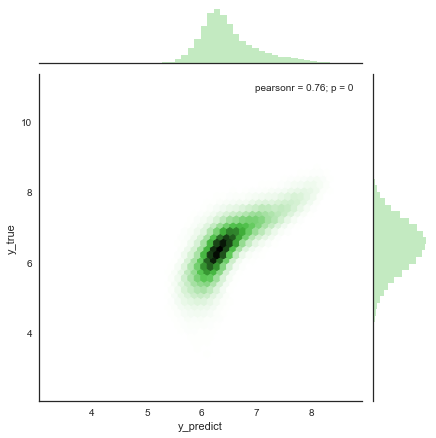

In [90]:
sns.jointplot(y_pred, y_test, kind="hex",color="g").set_axis_labels("y_predict", "y_true")

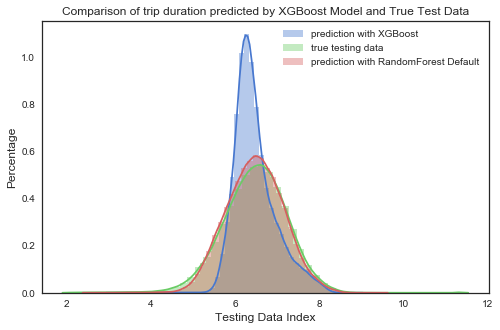

In [103]:
plt.figure(figsize=(8,5))
sns.distplot(y_pred,bins=50, kde=True,label="prediction with XGBoost")
sns.distplot(y_test,bins=50, kde=True,label="true testing data")
sns.distplot(y_pred_rf,bins=50, kde=True,label="prediction with RandomForest Default")
plt.xlabel("Testing Data Index", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Comparison of trip duration predicted by XGBoost Model and True Test Data")
plt.legend()
plt.show()

### Reflection

The whole analysis of this project can be devided into these steps:

    1. define the problem and evaluation metrics. The problem is to predict the trip duration in NYC based on collected data, including vendor id, locations, datetime, etc. The evaluation metric is Root Mean Squared Logarithmic Error. Due to wide scatterd data characteristics, convert trip durations into log function makes sense. 
    
    2. Explore the data. The following aspects of the data are explored:  testing data:
        * The shape of training, to get a rough understanding on the data dimension and problem complexcity.
        * Plot the training y value to check for any outliers. 
        * Check if there is any missing value.
        * Check the data format of each column.
        
    3. Exploratory Visualization with Data Preprocessing. Summarization and relevant characteristic about the data are visualized.     
        * Store_forward flag records comparison.
        * Pickup hour effect to trip durations, and trip counts. 
        * Pickup day effect to trip durations, and trip counts. 
        * Pickup month effect to trip durations, and trip counts. 
        * Vendor id effect to trip duration and trip counts. 
        * Pickup, dropoff 2D locations. 
        * Pickup, dropoff locations animation on NYC map changing with month. 
        
     4. Algorithms and Techniques. XGBoost algorithm is discussed on advantages, parameter tuning, etc. 
     
     5. Benchmark model. The medium number of each hour is used as the benchmark model. In the later of the project, adaboost and randomforester models are brought in and compared as supplymentary benchmark models. 
     
     6. Data Preprocessing
         * From Data Exploration section, there are outliers that requires to be taken out.  
         * Some of the features are needed to taken out for model regression.
         * Convert y_model, which stands for trip duration to log(1+trip_duration).
         
     7. XGBoost Algorithm is implemented with grid search technique applied on max_depth, min_child_weight and learning rate. From the experiment, the combination of Max_depth as 10, min_child_weight as 30, learning rate as 0.3 is the optimal solution and returns 0.5053 as best RMSLE score. 
     
     8. Results evaluation and improvent
         * Adaboost and random forests algorithm are explored and returns 0.3829 RMSLE score.
         * Compare with Random Forest and XGBoost regressors, Adaboost predictive features are more a balanced of location, vendor, passenger count, and datetime. 
         * Cross validation and grid search are implemented in RandomForest model.
         * Compare the results and time spend to train the model, XGBoost is a better choice and the final model used to predict NYC taxi trip duration.
    
The predictions from XGBoost and RandomForest are plotted in More Visualization session. From the image, we can tell that default RF overlaps well with the true testing data. However, perfect fitting does not mean this model will work well with new conditions and give a robust prediction. 


### Improvement

From feature plots we could see each features weight differently and influence predictions. Take the top five features predicted by XGBoost for example. The cumulative of the top five features are pickup latitude, dropoff longitude, dropoff latitude, pickup longitude and pickup days. The cumulative weight is 87% out of all the features weights. The less important feataures split the rest 23% of the weight. From this aspect, we can see the features weighting in the model is somehow biased. Feature scaling could be implemented in data preprocessing to ensure that each feature is treated equally when applying supervised learners regressors. 

